In [1]:
#import dependencies
from jax.config import config
config.update("jax_enable_x64", True)
import jax.numpy as jnp

import numpy as np
import matplotlib.pyplot as plt
#from tensorflow_probability.substrates.jax.internal.dtype_util

import pandas as pd
data = pd.read_pickle('/home/dkn16/data.pkl')
FGnopol = data.beam.foregrounds.all_nopol
FGpol = data.beam.foregrounds.pleak
HI = data.beam.HI
noise = data.beam.noise
freqs = data.freqs

from gpr4im import pk_tools as pk
import matplotlib.pyplot as plt
font = {"size": 18, "family": "sans-serif"}
axislabelfontsize = "x-large"
plt.rc("font", **font)
plt.rcParams["text.usetex"] = False

In [2]:
cosmos = jnp.array(HI+noise)[0:256,0:256,0:256].astype(jnp.float64)
cosmos = cosmos - jnp.mean(cosmos,axis=(0,1))

pred_HGP = np.mean(np.load('/scratch/dkn16/result_hgp_pol.npy'),axis=0)*1000
pred_HGP_nopol = np.mean(np.load('/scratch/dkn16/result_hgp_nopol.npy'),axis=0)*1000
pred_CP = np.load('/scratch/dkn16/result_CP.npy')*1000
pred_NP = np.mean(np.load('/scratch/dkn16/result_np_pol_suppix1.npy'),axis=0)*1000

"pred_HGP = np.mean(np.load('/scratch/dkn16/result_hgp_pol_rfi0.5.npy'),axis=0)*1000\npred_HGP_nopol = np.mean(np.load('/scratch/dkn16/result_hgp_nopol_rfi0.5.npy'),axis=0)*1000\nprint(pred_HGP_nopol.shape)\n#pred_HGP = np.mean(np.load('/scratch/dkn16/result_superpixel_hgp_pol_noise50.npy'),axis=0)*1000\npred_CP = np.load('/scratch/dkn16/result_CP_rfi0.5.npy')*1000\npred_NP_nopol = np.mean(np.load('/scratch/dkn16/result_np_nopol_rfi0.5.npy'),axis=0)*1000\npred_NP = np.mean(np.load('/scratch/dkn16/result_np_pol_suppix1_rfi0.5.npy'),axis=0)*1000"

In [3]:
# Dimension of data cube:
lx, ly, lz = 1000*(256/256.),1000*(256/256.), 924.78*(256/285.), #Mpc/h
nx, ny, nz = 256, 256, 256

# minimum and maximum k in each direction:
kmin, kmin_perp, kmin_par = 2*np.pi/pow(lx*ly*lz, 1/3), 2*np.pi/np.sqrt(lx**2 + ly**2), 2*np.pi/lz
kmax, kmax_par, kmax_perp = 0.4, 0.4, 0.4

# set width of k bins to be 2*kmin
dk, dk_perp, dk_par = 2*kmin, 2*kmin_perp, 2*kmin_par

# number of k bins:
nkbin = int((kmax-kmin)/dk)
nkbin_perp = int((kmax_perp-kmin_perp)/dk_perp)
nkbin_par = int((kmax_par-kmin_par)/dk_par)

# setting array of k bin edges:
kbins = np.arange(kmin,kmax,dk)
kbins_perp = np.arange(kmin_perp,kmax_perp,dk_perp)
kbins_par = np.arange(kmin_par,kmax_par,dk_par)

# array of kbin centers:
k = np.linspace(kmin+0.5*dk,kmax-0.5*dk,nkbin)
kperp = np.linspace(kmin_perp+0.5*dk_perp,kmax_perp-0.5*dk_perp,nkbin_perp)
kpar = np.linspace(kmin_par+0.5*dk_par,kmax_par-0.5*dk_par,nkbin_par)

In [5]:
w = W = np.ones((256, 256, 256))
slice5 = slice(0, 256)

freqs_sliced = freqs[slice5]
HI_noise_data_sliced = cosmos
HGP_pol = pred_HGP
HGP_nopol = pred_HGP_nopol
NP_pol = pred_NP
CP_pol = pred_CP


In [6]:
HI_pk3, nmodes3 = pk.getpk(HI_noise_data_sliced,w,W,nx,ny,nz,lx,ly,lz,kbins)
HI_pk_para3, nmodespar3 = pk.ParaPk(HI_noise_data_sliced, nx, ny, nz, lx, ly, lz, kbins_par, w, W)
HI_pk_perp3, nmodesperp3 = pk.PerpPk(HI_noise_data_sliced, nx, ny, nz, lx, ly, lz, kbins_perp, w, W)

HGP_pol_pk3, nmodes3 = pk.getpk(HGP_pol,w,W,nx,ny,nz,lx,ly,lz,kbins)
HGP_pol_pk_para3, nmodespar3 = pk.ParaPk(HGP_pol, nx, ny, nz, lx, ly, lz, kbins_par, w, W)
HGP_pol_pk_perp3, nmodesperp3 = pk.PerpPk(HGP_pol, nx, ny, nz, lx, ly, lz, kbins_perp, w, W)


HGP_nopol_pk3, nmodes3 = pk.getpk(HGP_nopol,w,W,nx,ny,nz,lx,ly,lz,kbins)
HGP_nopol_pk_para3, nmodespar3 = pk.ParaPk(HGP_nopol, nx, ny, nz, lx, ly, lz, kbins_par, w, W)
HGP_nopol_pk_perp3, nmodesperp3 = pk.PerpPk(HGP_nopol, nx, ny, nz, lx, ly, lz, kbins_perp, w, W)

NP_pol_pk3, nmodes3 = pk.getpk(NP_pol,w,W,nx,ny,nz,lx,ly,lz,kbins)
NP_pol_pk_para3, nmodespar3 = pk.ParaPk(NP_pol, nx, ny, nz, lx, ly, lz, kbins_par, w, W)
NP_pol_pk_perp3, nmodesperp3 = pk.PerpPk(NP_pol, nx, ny, nz, lx, ly, lz, kbins_perp, w, W)


CP_pk3, nmodes3 = pk.getpk(CP_pol,w,W,nx,ny,nz,lx,ly,lz,kbins)
CP_pk_para3, nmodespar3 = pk.ParaPk(CP_pol, nx, ny, nz, lx, ly, lz, kbins_par, w, W)
CP_pk_perp3, nmodesperp3 = pk.PerpPk(CP_pol, nx, ny, nz, lx, ly, lz, kbins_perp, w, W)

In [7]:
k = k[1:]
HI_pk3 = HI_pk3[1:]
HGP_nopol_pk3 = HGP_nopol_pk3[1:]
NP_pol_pk3 = NP_pol_pk3[1:]
HGP_pol_pk3 = HGP_pol_pk3[1:]
CP_pk3 = CP_pk3[1:]


kpar = kpar[1:]
HI_pk_para3 = HI_pk_para3[1:]

NP_pol_pk_para3 = NP_pol_pk_para3[1:]
HGP_nopol_pk_para3 = HGP_nopol_pk_para3[1:]
HGP_pol_pk_para3 = HGP_pol_pk_para3[1:]
CP_pk_para3 = CP_pk_para3[1:]


kperp = kperp[1:]
HI_pk_perp3 = HI_pk_perp3[1:]
HGP_nopol_pk_perp3 = HGP_nopol_pk_perp3[1:]
NP_pol_pk_perp3 = NP_pol_pk_perp3[1:]
HGP_pol_pk_perp3 = HGP_pol_pk_perp3[1:]
CP_pk_perp3 = CP_pk_perp3[1:]


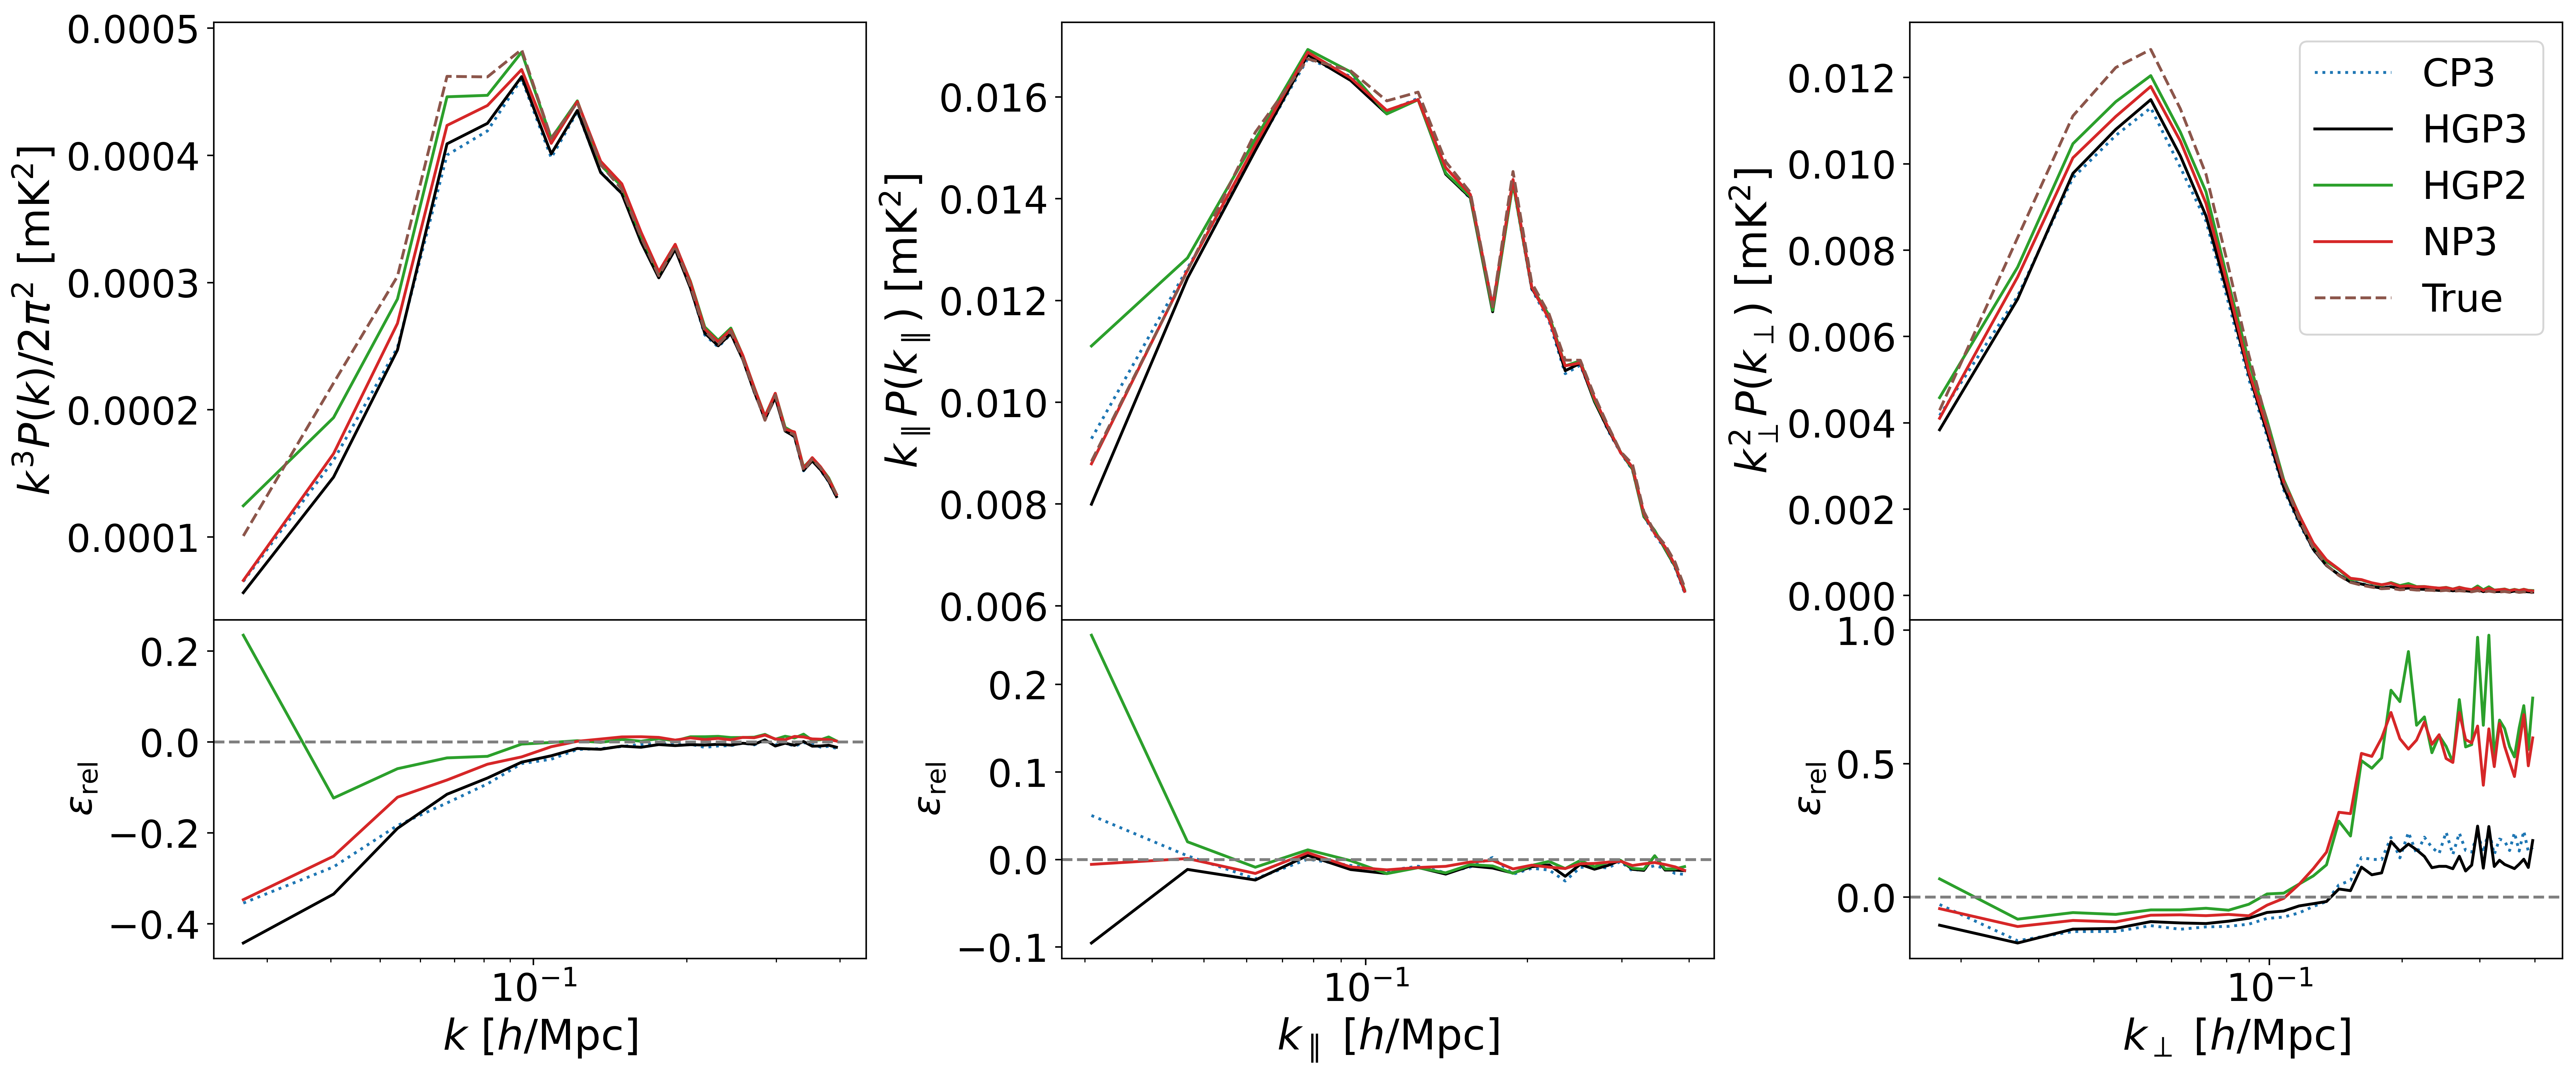

In [9]:
import matplotlib.pyplot as plt
font = {"size": 20, "family": "sans-serif"}
axislabelfontsize = "x-large"
plt.rc("font", **font)
plt.rcParams["text.usetex"] = False
fig, ((ax1, ax3, ax5), (ax2, ax4, ax6)) = plt.subplots(nrows=2, ncols=3, sharex='col', 
                                                       figsize=(22,9), gridspec_kw={'height_ratios': [3, 1.7]},dpi=500)
fig.subplots_adjust(hspace=0, wspace=0.3)

ax1.plot(k, (k*k*k*CP_pk3)/(2*np.pi*np.pi), ls=':')
ax1.plot(k, (k*k*k*HGP_pol_pk3)/(2*np.pi*np.pi), ls='solid',color='black')
ax1.plot(k, (k*k*k*HGP_nopol_pk3)/(2*np.pi*np.pi), ls='solid',color='tab:green')
#plt.plot(k, (k*k*k*NP_nopol_pk3)/(2*np.pi*np.pi), ls='solid')
ax1.plot(k, (k*k*k*NP_pol_pk3)/(2*np.pi*np.pi), ls='solid',color='tab:red')

ax1.plot(k, (k*k*k*HI_pk3)/(2*np.pi*np.pi), ls='--',color = '#8c564b')
ax2.set_xlabel(r'$k$ [$h$/Mpc]', fontsize=22)
ax1.set_ylabel(r'$k^3P(k)/2\pi^2\ [\rm mK^2]$', fontsize=22)
ax1.set_xscale('log')

ax2.plot(k, (CP_pk3-HI_pk3)/(HI_pk3), ls=':')
ax2.plot(k, (HGP_pol_pk3-HI_pk3)/(HI_pk3), ls='solid',color='black')
ax2.plot(k, (HGP_nopol_pk3-HI_pk3)/(HI_pk3), ls='solid',color='tab:green')
#plt.plot(k, (k*k*k*NP_nopol_pk3)/(2*np.pi*np.pi), ls='solid')
ax2.plot(k, (NP_pol_pk3-HI_pk3)/(HI_pk3), ls='solid',color='tab:red')
ax2.set_ylabel(r'$\epsilon_{\rm rel}$')
ax2.axhline(0.0,0,1,color='tab:grey',linestyle = '--')
#ax1.plot(k, (k*k*k*HI_pk3)/(2*np.pi*np.pi), ls='--',color = '#8c564b')





ax3.plot(kpar, (kpar*CP_pk_para3), ls=':')
ax3.plot(kpar, (kpar*HGP_pol_pk_para3), ls='solid',color='black')
ax3.plot(kpar, (kpar*HGP_nopol_pk_para3), ls='solid',color='tab:green')
#plt.plot(kpar, (kpar*NP_nopol_pk_para3), ls='solid')
ax3.plot(kpar, (kpar*NP_pol_pk_para3), ls='solid',color='tab:red')

ax3.plot(kpar, (kpar*HI_pk_para3), ls='--',color = '#8c564b')

ax4.set_xlabel(r'$k_\parallel$ [$h$/Mpc]', fontsize=22)
ax3.set_ylabel(r'$k_{\parallel}P(k_{\parallel})\ [\rm mK^2]$', fontsize=22)
ax3.set_xscale('log')


ax4.plot(kpar, (CP_pk_para3-HI_pk_para3)/(HI_pk_para3), ls=':')
ax4.plot(kpar, (HGP_pol_pk_para3-HI_pk_para3)/(HI_pk_para3), ls='solid',color='black')
ax4.plot(kpar, (HGP_nopol_pk_para3-HI_pk_para3)/(HI_pk_para3), ls='solid',color='tab:green')
#plt.plot(k, (k*k*k*NP_nopol_pk3)/(2*np.pi*np.pi), ls='solid')
ax4.plot(kpar, (NP_pol_pk_para3-HI_pk_para3)/(HI_pk_para3), ls='solid',color='tab:red')
ax4.set_ylabel(r'$\epsilon_{\rm rel}$')
ax4.axhline(0.0,0,1,color='tab:grey',linestyle = '--')



ax5.plot(kperp, (kperp*kperp*CP_pk_perp3), ls=':')
ax5.plot(kperp, (kperp*kperp*HGP_pol_pk_perp3), ls='solid',color='black')
ax5.plot(kperp, (kperp*kperp*HGP_nopol_pk_perp3), ls='solid',color='tab:green')
#plt.plot(kperp, (kperp*kperp*NP_nopol_pk_perp3), ls='solid')
ax5.plot(kperp, (kperp*kperp*NP_pol_pk_perp3), ls='solid',color='tab:red')

ax5.plot(kperp, (kperp*kperp*HI_pk_perp3), ls='--',color = '#8c564b')

ax6.set_xlabel('$k_\perp$ [$h$/Mpc]', fontsize=22)
ax5.set_ylabel(r'$k_{\perp}^2P(k_{\perp})\ [\rm mK^2]$', fontsize=22)
ax5.legend(['CP3','HGP3','HGP2','NP3','True'], fontsize=20)
#plt.legend(['CP','HGP','NP','True'])

ax5.set_xscale('log')


ax6.plot(kperp, (CP_pk_perp3-HI_pk_perp3)/(HI_pk_perp3), ls=':')
ax6.plot(kperp, (HGP_pol_pk_perp3-HI_pk_perp3)/(HI_pk_perp3), ls='solid',color='black')
ax6.plot(kperp, (HGP_nopol_pk_perp3-HI_pk_perp3)/(HI_pk_perp3), ls='solid',color='tab:green')
#plt.plot(k, (k*k*k*NP_nopol_pk3)/(2*np.pi*np.pi), ls='solid')
ax6.plot(kperp, (NP_pol_pk_perp3-HI_pk_perp3)/(HI_pk_perp3), ls='solid',color='tab:red')
ax6.set_ylabel(r'$\epsilon_{\rm rel}$')
ax6.axhline(0.0,0,1,color='tab:grey',linestyle = '--')

#plt.savefig('PS_default.pdf',bbox_inches='tight',dpi=400)
#plt.tight_layout()